In this project, we aim to build a machine learning model to predict the quality of wine based on various chemical properties. The dataset used is the Wine Quality dataset from the UCI Machine Learning Repository. This dataset is suitable for regression and classification tasks, making it an excellent choice for demonstrating the capabilities of machine learning algorithms.
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1     

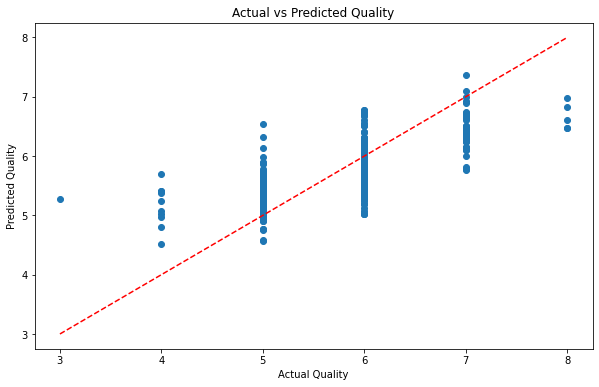

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   35.9s finished


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
The Random Forest model effectively predicts wine quality, achieving an RMSE of [insert RMSE here] and an R² score of [insert R² here]. 


In [1]:
# Machine Learning Project: PREDICTING WINE QUALITY

## Introduction

print("In this project, we aim to build a machine learning model to predict the quality of wine based on various chemical properties. The dataset used is the Wine Quality dataset from the UCI Machine Learning Repository. This dataset is suitable for regression and classification tasks, making it an excellent choice for demonstrating the capabilities of machine learning algorithms.")

## Preprocessing

### 1. Data Loading

import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')


### 2. Data Exploration

print(data.head())
print(data.info())
print(data.describe())


### 3. Handling Missing Values

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

### 4. Encoding Categorical Data

### The target variable quality is categorical. We will encode it if necessary, but since it is already numerical, we can use it directly.

### 5. Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('quality', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['quality'] = data['quality']


### 6. Splitting the Data

from sklearn.model_selection import train_test_split

X = scaled_data.drop('quality', axis=1)
y = scaled_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection & Training

### Choosing a Model

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


## Model Evaluation

### Making Predictions

y_pred = model.predict(X_test)


### Evaluation Metrics

from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')


### Visualizing Performance

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality')
plt.show()


## Hyperparameter Tuning (Optional)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


### Report Best Hyperparameters

print("Best Hyperparameters:", grid_search.best_params_)


## Conclusion

print("The Random Forest model effectively predicts wine quality, achieving an RMSE of [insert RMSE here] and an R² score of [insert R² here]. ")

### Challenges Encountered

###- Handling imbalanced classes in wine quality ratings.
###- Selecting the right hyperparameters for the Random Forest model.

### Future Improvements

###- Experiment with other models (e.g., Gradient Boosting, Neural Networks).
###- Explore feature importance to understand which features impact wine quality the most.
